![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [199]:
# Start your code here!
import pandas as pd
women_df=pd.read_csv("women_results.csv")
men_df=pd.read_csv("men_results.csv")
alpha=0.1

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

In [201]:
#First check of Dataframes
print(women_df.head())
print(men_df.head())

   Unnamed: 0        date home_team  ... home_score  away_score        tournament
0           0  1969-11-01     Italy  ...          1           0              Euro
1           1  1969-11-01   Denmark  ...          4           3              Euro
2           2  1969-11-02   England  ...          2           0              Euro
3           3  1969-11-02     Italy  ...          3           1              Euro
4           4  1975-08-25  Thailand  ...          3           2  AFC Championship

[5 rows x 7 columns]
   Unnamed: 0        date home_team  ... home_score  away_score  tournament
0           0  1872-11-30  Scotland  ...          0           0    Friendly
1           1  1873-03-08   England  ...          4           2    Friendly
2           2  1874-03-07  Scotland  ...          2           1    Friendly
3           3  1875-03-06   England  ...          2           2    Friendly
4           4  1876-03-04  Scotland  ...          3           0    Friendly

[5 rows x 7 columns]


In [202]:
#Get information about tournament categories
print(women_df["tournament"].value_counts())
print(men_df["tournament"].value_counts())

UEFA Euro qualification                 1445
Algarve Cup                              551
FIFA World Cup                           284
AFC Championship                         268
Cyprus Cup                               258
African Championship qualification       226
UEFA Euro                                184
African Championship                     173
FIFA World Cup qualification             172
CONCACAF Gold Cup qualification          143
AFC Asian Cup qualification              141
Copa América                             131
Olympic Games                            130
CONCACAF Gold Cup                        126
Friendly                                 111
AFC Asian Cup                            111
Four Nations Tournament                  106
OFC Championship                          78
African Cup of Nations qualification      58
CONCACAF Championship                     42
SheBelieves Cup                           39
Euro                                      20
African Cu

In [203]:
#Filtering matches as only Fifa World Cup
wc_women=women_df[women_df["tournament"]=="FIFA World Cup"]
wc_men=men_df[men_df["tournament"]=="FIFA World Cup"]
#Check the new dataframes
print(wc_men.head())
print(wc_men.info())
print(wc_women.head())
print(wc_women.info())


      Unnamed: 0        date  home_team  ... home_score  away_score      tournament
1311        1311  1930-07-13    Belgium  ...          0           3  FIFA World Cup
1312        1312  1930-07-13     France  ...          4           1  FIFA World Cup
1313        1313  1930-07-14     Brazil  ...          1           2  FIFA World Cup
1314        1314  1930-07-14       Peru  ...          1           3  FIFA World Cup
1315        1315  1930-07-15  Argentina  ...          1           0  FIFA World Cup

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 1311 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  964 non-null    int64 
 1   date        964 non-null    object
 2   home_team   964 non-null    object
 3   away_team   964 non-null    object
 4   home_score  964 non-null    int64 
 5   away_score  964 non-null    int64 
 6   tournament  964 non-null    object
dtype

In [204]:
wc_men["total_goals"]=wc_men["home_score"]+wc_men["away_score"]
wc_women["total_goals"]=wc_women["home_score"]+wc_women["away_score"]

In [205]:
wc_men.reset_index
wc_women.reset_index
print(wc_men.head())
print(wc_women.head())

      Unnamed: 0        date  ...      tournament total_goals
1311        1311  1930-07-13  ...  FIFA World Cup           3
1312        1312  1930-07-13  ...  FIFA World Cup           5
1313        1313  1930-07-14  ...  FIFA World Cup           3
1314        1314  1930-07-14  ...  FIFA World Cup           4
1315        1315  1930-07-15  ...  FIFA World Cup           1

[5 rows x 8 columns]
     Unnamed: 0        date home_team  ... away_score      tournament  total_goals
429         429  1991-11-16  China PR  ...          0  FIFA World Cup            4
430         430  1991-11-17   Denmark  ...          0  FIFA World Cup            3
431         431  1991-11-17     Japan  ...          1  FIFA World Cup            1
432         432  1991-11-17    Sweden  ...          3  FIFA World Cup            5
433         433  1991-11-17   Germany  ...          0  FIFA World Cup            4

[5 rows x 8 columns]


In [206]:
#Resetting index to get rid of old dataframe's index
wc_men.reset_index(inplace=True)
wc_women.reset_index(inplace=True)

In [207]:
#Drop the unnecessary columns
wc_men.drop(columns=["index","Unnamed: 0"],inplace=True)
wc_women.drop(columns=["index","Unnamed: 0"],inplace=True)

In [208]:
#Check whether scores columns have Na values or not
wc_women[["home_score","away_score"]].isna().value_counts()
wc_men[["home_score","away_score"]].isna().value_counts()

home_score  away_score
False       False         964
dtype: int64

In [209]:
wc_women["date"]=pd.to_datetime(wc_women["date"])
wc_men["date"]=pd.to_datetime(wc_men["date"])

In [210]:
#Converting data type of "date" column to datetime 
wc_men["date"] = pd.to_datetime(wc_men["date"])
wc_women["date"] = pd.to_datetime(wc_women["date"])

wc_men["date"] = wc_men["date"].dt.strftime('%Y-%m-%d')
wc_women["date"] = wc_women["date"].dt.strftime('%Y-%m-%d')

In [211]:
#Filtering matches after 2002-01-01
wc_men2002=wc_men[wc_men["date"]>="2002-01-01"]
wc_women2002=wc_women[wc_women["date"]>="2002-01-01"]

In [212]:
#Indicating means and standart deviations of total goals
#Mean
women_mean=wc_women2002["total_goals"].mean()
men_mean=wc_men2002["total_goals"].mean()
print("mean_woman:",women_mean," mean_men:",men_mean)
#Standart Deviation
women_std=wc_women2002["total_goals"].std()
men_std=men_mean=wc_men2002["total_goals"].std()
print("std_woman:",women_std," std_men:",men_std)

mean_woman: 2.98  mean_men: 2.5130208333333335
std_woman: 2.022387265401036  std_men: 1.6525436488378111


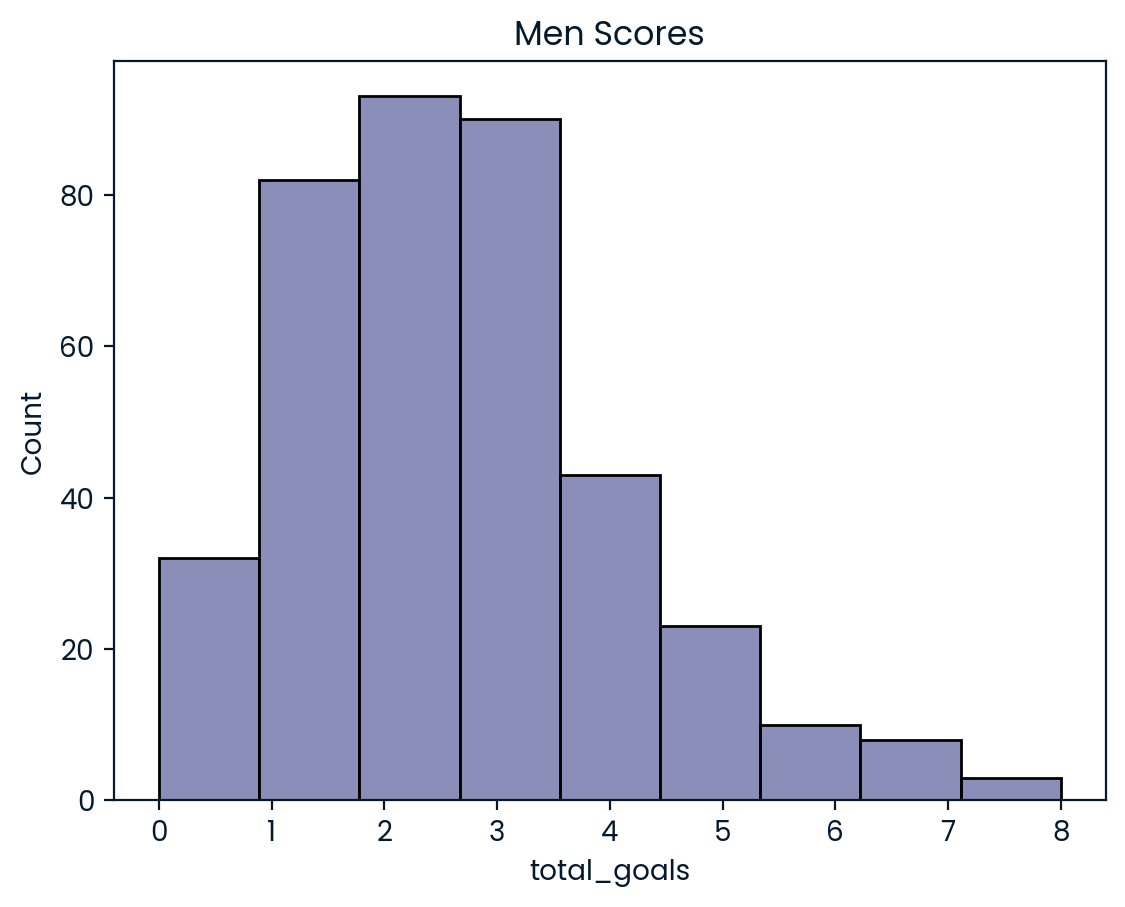

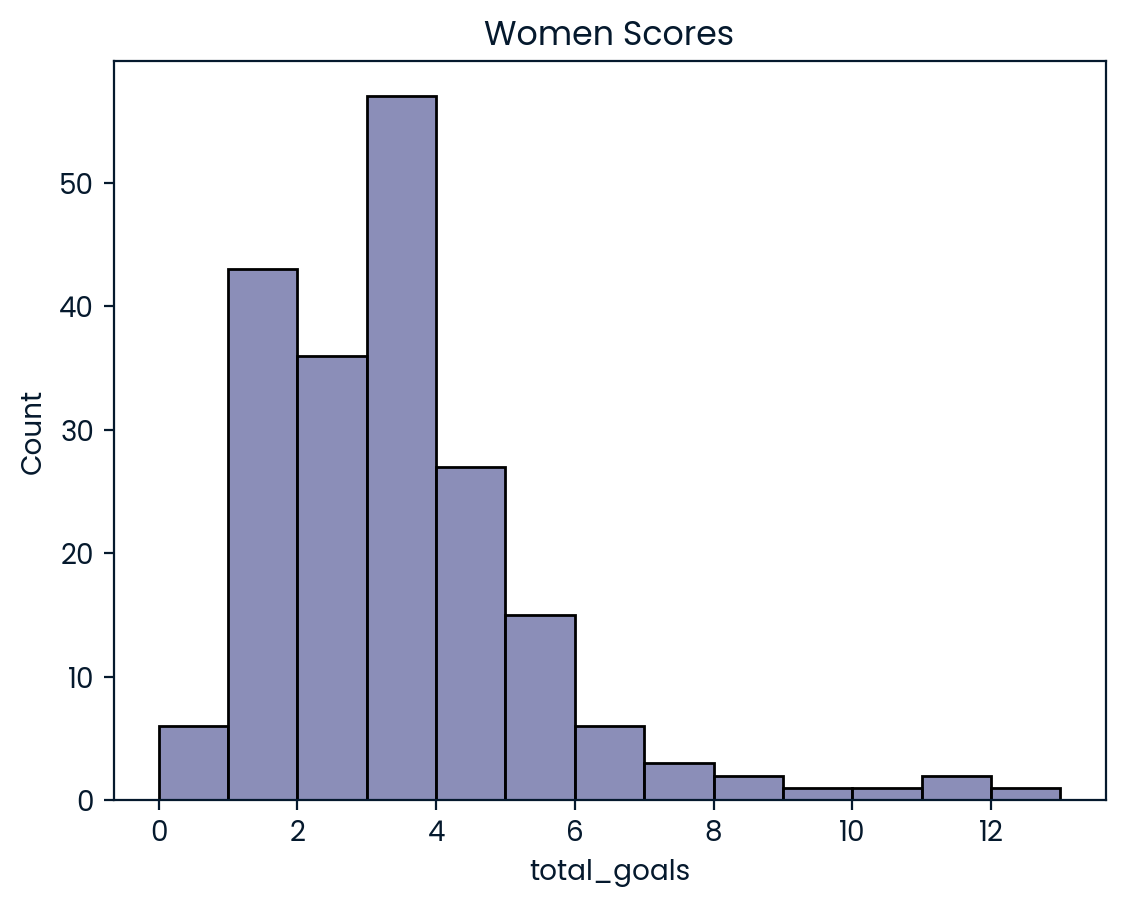

In [213]:
#Visualize the total goals to check whether scores are normally distributed 
sns.histplot(data=wc_men2002,x="total_goals",bins=9)
plt.title("Men Scores")
plt.show()
sns.histplot(data=wc_women2002,x="total_goals",bins=13)
plt.title("Women Scores")
plt.show()

The histograms shows that both scores of women and men are not distributed normally.
So, We should use the non-parametric test which is named Wilcoxon-Mann-Whitney test.

In [214]:
import pingouin

In [215]:
pingouin.ttest(x=wc_women2002["total_goals"],y=wc_men2002["total_goals"],alternative="greater")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.812823,340.102801,greater,0.002598,"[0.19, inf]",0.261228,8.927,0.911063


In [216]:
wc_women2002["subset"]="women"
wc_men2002["subset"]="men"

In [217]:
main_df=pd.concat([wc_men2002[["total_goals","subset"]],wc_women2002[["total_goals","subset"]]],
axis=0,ignore_index=True)

In [218]:
main_pivot=main_df.pivot(columns="subset",values="total_goals")
results=pingouin.mwu(x=main_pivot["women"],y=main_pivot["men"],alternative="greater")

In [219]:
results

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


In [220]:
result_dict = {"p_val": 0.0051066098, "result": "reject"}